# Ce notebook explore la comparaison de gros documents avec le pipeline de RAG

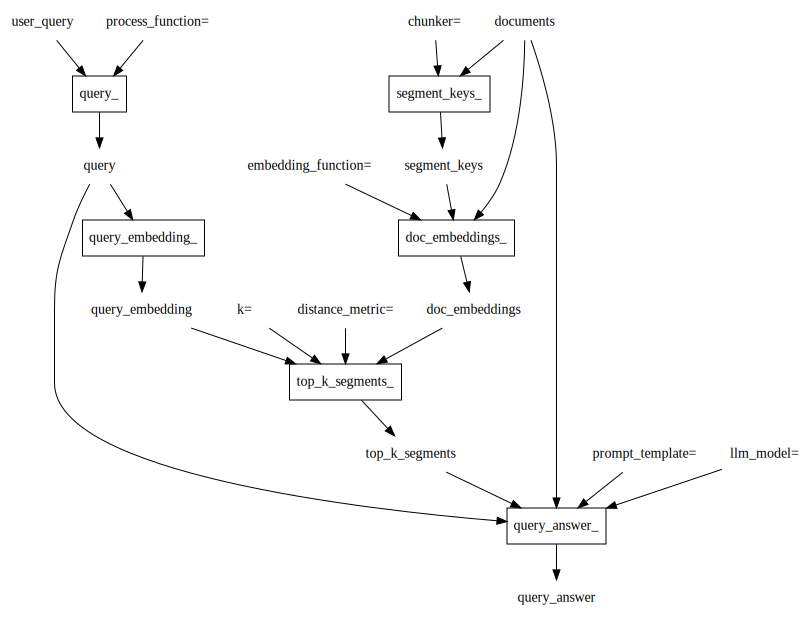

In [1]:
from raglab.retrieval.lib_alexis import dag
dag.dot_digraph()

Création d'un store sur les fichiers de contracts

In [2]:
from i2 import Namespace
from dol import Files
from raglab.retrieval.lib_alexis import extension_base_wrap
folder_path = "/Users/alexis/Documents/GitHub/rag_sante/contracts/"

mall = Namespace(contracts = extension_base_wrap(Files(folder_path)))

In [79]:
# tous les contracts dans le dossier
list(mall.contracts)

['240402 Axeptio X ADDIX GROUP - Conditions generales de partenariat anglais francais 050424[228731].pdf',
 'Contrat + Bons de commande-Antoine NASSIF + Pierre TCHEKOUTEU-301223.pdf',
 'Contrat AddixWare GreenCom Networks_V2.pdf',
 'Contrat PSI_ADDIXWARE (Mathilde Chenillot) (1).pdf',
 'Contrat d_assistance technique-Axeptio-ADW [60][228732].pdf',
 'Contrat_ONE140623_Dvlpmt UO & KPI Pilotage Site SAFRAN Châtellerault_2023 07 21 (signed).pdf',
 'Avenant Contrat AddixWare GreenCom Networks_V2.pdf',
 'Annexe 3 CP - Schneider 2021 - V2.pdf']

création d'un mapping pour les documents (à stocker dans un DB)

In [23]:
documents = dict(mall.contracts)

{'240402 Axeptio X ADDIX GROUP - Conditions generales de partenariat anglais francais 050424[228731].pdf': 'c.Le Partenaire peut cependant sous-traiter certaines de ses\nAgilita\'on – Condi\'ons générales de partenariat missions, sous réserve du respect des règles qui s’appliquent\nà ce cas de figure dans le Contrat.\n1.Défini\'ons de certains termes applicables aux CGP\n6.Personnel référant, désigna\'on & remplacement.\na.Dans les CGP, certains termes font l’objet d’une défini:on\na.Les par:es peuvent désigner chacune une personne\nprévue dans cet ar:cle afin d’éviter toute ambigüité entre les\nréférente sur les projets en cours pour fluidifier les échanges.\npar:es quant à leur significa:on exacte.\nb. Ces personnes doivent alors être en mesure d’accepter ou\nb.Ces défini:ons s’imposent donc aux Par:es : Annexe(s) : de refuser rapidement les proposi:ons techniques\ndésigne le(s) document(s) que les parEes rédigent proposées par le Partenaire et de faire les choix nécessaires\nséparém

Sélection de 2 contracts

In [32]:
selection  = ["240402 Axeptio X ADDIX GROUP - Conditions generales de partenariat anglais francais 050424[228731].pdf", "Contrat PSI_ADDIXWARE (Mathilde Chenillot) (1).pdf"]
selected_docs = dict({
    key: value for key, value in documents.items() if key in selection}
)

selected_docs

{'240402 Axeptio X ADDIX GROUP - Conditions generales de partenariat anglais francais 050424[228731].pdf': 'c.Le Partenaire peut cependant sous-traiter certaines de ses\nAgilita\'on – Condi\'ons générales de partenariat missions, sous réserve du respect des règles qui s’appliquent\nà ce cas de figure dans le Contrat.\n1.Défini\'ons de certains termes applicables aux CGP\n6.Personnel référant, désigna\'on & remplacement.\na.Dans les CGP, certains termes font l’objet d’une défini:on\na.Les par:es peuvent désigner chacune une personne\nprévue dans cet ar:cle afin d’éviter toute ambigüité entre les\nréférente sur les projets en cours pour fluidifier les échanges.\npar:es quant à leur significa:on exacte.\nb. Ces personnes doivent alors être en mesure d’accepter ou\nb.Ces défini:ons s’imposent donc aux Par:es : Annexe(s) : de refuser rapidement les proposi:ons techniques\ndésigne le(s) document(s) que les parEes rédigent proposées par le Partenaire et de faire les choix nécessaires\nséparém

Embeddings des documents selectionnés

In [81]:
selection_embedding = dag[:"doc_embeddings"](selected_docs) # can change the chunker

In [39]:
# iterate through One document
doc1_embedding = {key: value for key, value in selection_embedding.items() if key[0] == selection[0]}
doc2_embedding = {key: value for key, value in selection_embedding.items() if key[0] == selection[1]}

Créations d'une corresponce par clés des segments à comparer

In [70]:
to_compare_list = []
for key, value in doc1_embedding.items():
    key_to_compare = dag["query_embedding":"top_k_segments"](query_embedding = value, k = 3, doc_embeddings = doc2_embedding)
    to_compare_list.append( key_to_compare)

    print(f"\nsegment of doc1 {key[1:3]} to be compared with segments:")
    for key2 in key_to_compare:
        print(f"segment of doc2 {key2[1:3]}")
    
z = zip(doc1_embedding.keys(), to_compare_list) # tuples : (key of doc1, list of keys of doc2 to compare)


segment of doc1 (0, 2998) to be compared with segments:
segment of doc2 (28896, 31869)
segment of doc2 (2900, 5809)
segment of doc2 (0, 2923)

segment of doc1 (2937, 5923) to be compared with segments:
segment of doc2 (2900, 5809)
segment of doc2 (5732, 8677)
segment of doc2 (28896, 31869)

segment of doc1 (5850, 8748) to be compared with segments:
segment of doc2 (8658, 11629)
segment of doc2 (11540, 14531)
segment of doc2 (5732, 8677)

segment of doc1 (8687, 11629) to be compared with segments:
segment of doc2 (28896, 31869)
segment of doc2 (37627, 40580)
segment of doc2 (31789, 34746)

segment of doc1 (11630, 14622) to be compared with segments:
segment of doc2 (31789, 34746)
segment of doc2 (34732, 37715)
segment of doc2 (37627, 40580)

segment of doc1 (14554, 17501) to be compared with segments:
segment of doc2 (37627, 40580)
segment of doc2 (34732, 37715)
segment of doc2 (31789, 34746)

segment of doc1 (17439, 20433) to be compared with segments:
segment of doc2 (37627, 40580)
s

comparaison pour le premier segment

In [82]:
from raglab.retrieval.lib_alexis import query_answer
z = zip(doc1_embedding.keys(), to_compare_list) # tuples : (key of doc1, list of keys of doc2 to compare)
comparaisons = []
for id1, list_id2 in z:
  comparison = query_answer(query=documents[id1[0]][id1[1]:id1[2]],
                            documents=documents,
                              top_k_segments=list_id2,
                            prompt_template="compare le document 1: {query} avec le document2 : {documents} en francais"
  )
  comparaisons.append(comparison)

# write comparaisons in text file
with open("comparaisons.txt", "w") as f:
  for comparison in comparaisons:
    f.write(comparison)
    f.write("\n\n")

## Essai de pipeline RAG sur les contracts pour le question/reponse

In [14]:
responce = dag[:"top_k_segments"](documents=documents, user_query="quel est la reglementation pour les déjeunés en entreprise. Où doivent s'effectuer les repas?", k=1)
responce = responce[0]
print(documents[responce[0]][responce[1]:responce[2]])